# **KÜTÜPHANELERİ İMPORT ETME**

In [177]:
import numpy as np
import pandas as pd
import torch
import random

import torchvision
import torch.nn as nn

import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,models,transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import os
import cv2  # Görüntüleri yüklemek için OpenCV (ya da başka bir kütüphane)

import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import accuracy_score,cohen_kappa_score
from sklearn.metrics import classification_report
from PIL import Image

import warnings # "warnings" modülü sayesinde programın çıktısındaki uyarıların konsolda görülmesini engellenir
warnings.filterwarnings("ignore")


# **GPU Kullanımını Doğrulama**

In [161]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)
print()

if device.type == "cuda": #cihazın bir GPU olup olmadığını kontrol eder. 
    print(torch.cuda.get_device_name(0))
    print("Memory Usage: ")
    print("Allocated: ", round(torch.cuda.memory_allocated(0) / 1024**3, 1), "GB")
    print("Reserved: ", round(torch.cuda.memory_reserved(0) / 1024**3, 1), "GB")


Using device:  cuda

NVIDIA GeForce RTX 3060 Laptop GPU
Memory Usage: 
Allocated:  0.7 GB
Reserved:  3.2 GB


# **Sistemin Özelliklerine Göre Otomatik Cihaz Seçimi**

In [162]:

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Training on GPU...Ready for HyperJumo...")
else:
    device=torch.device("cpu")
    print("Training on CPU...May the force be with you...")


Training on GPU...Ready for HyperJumo...



    Training on GPU...Ready for HyperJumo...
    Bu durumda, PyTorch modeli GPU üzerinde çalışacak ve işlemler çok daha hızlı gerçekleşecektir

CPU ise genellikle GPU'dan daha yavaş olduğu için, eğitim süreleri uzayabilir.

In [178]:
torch.cuda.is_available()

True

Eğer GPU Mevcut ve Kullanılabiliyorsa:

Sistemde bir NVIDIA GPU varsa,

CUDA sürücüleri doğru yüklenmişse,

PyTorch, CUDA'yı tanıyabiliyorsa,

Fonksiyon True döner.

**Bu işlemler, derin öğrenme ve makine öğrenimi modellerini GPU (Grafik İşlemci Birimi) üzerinde çalıştırmak için yapılır. GPU'lar, paralel işlem gücü sayesinde büyük miktarda veriyi hızlıca işleyebilir ve modellerin eğitim süresini önemli ölçüde kısaltır. İşlemlerin genel amacı, mevcut donanımı en verimli şekilde kullanarak performansı optimize etmektir.**

# **VERİ YÜKLEME**

In [189]:

#Proje klasöründen göreceli yollar belirleme
base_dir = os.path.dirname(r'C:\Users\ASUS\Desktop\classifi\supervised\dataset')  # Script'in bulunduğu dizin
train_dir = os.path.join(base_dir, 'dataset', 'train')
test_dir = os.path.join(base_dir, 'dataset', 'test')

# Transform işlemi
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])

# Veriyi yükleme
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [164]:
# 1. Veri Yükleme
transform = transforms.Compose([
    transforms.ToTensor(), #Görüntüleri PyTorch'un anlayabileceği bir tensöre dönüştürür.
    transforms.Normalize((0.5,), (0.5,))  # Veriyi normalize et (-1, 1 aralığına getirir)
])

# Veri dizinlerini belirleyin
train_dir = r'C:\Users\ASUS\Desktop\classifi\supervised\dataset\train'
test_dir = r'C:\Users\ASUS\Desktop\classifi\supervised\dataset\test'

# ImageFolder ile veri yükleme
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
#DataLoader: Veri setlerini eğitim veya test sırasında model için kolayca kullanılabilir hale getiren bir PyTorch sınıfıdır.
#Burada, batch size 64 olarak ayarlanmıştır. Bu, modelin her 64 örneği bir grup olarak işleyeceği ve her 64 örnekten sonra modelin ağırlıklarını güncelleyeceği anlamına gelir.

In [165]:
# Her iki dizinin de var olup olmadığını kontrol edelim
if not os.path.exists(train_dir):
    print(f"Error: Train dizini bulunamadı: {train_dir}")
else:
    print(f"Train dizini mevcut: {train_dir}")

if not os.path.exists(test_dir):
    print(f"Error: Test dizini bulunamadı: {test_dir}")
else:
    print(f"Test dizini mevcut: {test_dir}")

Train dizini mevcut: C:\Users\ASUS\Desktop\classifi\supervised\dataset\train
Test dizini mevcut: C:\Users\ASUS\Desktop\classifi\supervised\dataset\test


# *VERİ BOYUTU*

In [166]:
data_dir = "C:/Users/ASUS/Desktop/classifi/supervised/dataset"

# Tüm alt dizinleri ve dosyaları kontrol et
for sub_dir in ['train', 'test']:
    path = os.path.join(data_dir, sub_dir)
    if os.path.exists(path):
        print(f"Dizin mevcut: {path}")
        for class_dir in os.listdir(path):
            class_path = os.path.join(path, class_dir)
            if os.path.isdir(class_path):
                print(f"  Sınıf klasörü: {class_path}")
                files = [file for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))]
                print(f"    {len(files)} görüntü dosyası bulundu.")
    else:
        print(f"Dizin bulunamadı: {path}")


Dizin mevcut: C:/Users/ASUS/Desktop/classifi/supervised/dataset\train
  Sınıf klasörü: C:/Users/ASUS/Desktop/classifi/supervised/dataset\train\Airport
    324 görüntü dosyası bulundu.
  Sınıf klasörü: C:/Users/ASUS/Desktop/classifi/supervised/dataset\train\BareLand
    279 görüntü dosyası bulundu.
  Sınıf klasörü: C:/Users/ASUS/Desktop/classifi/supervised/dataset\train\BaseballField
    198 görüntü dosyası bulundu.
  Sınıf klasörü: C:/Users/ASUS/Desktop/classifi/supervised/dataset\train\Beach
    360 görüntü dosyası bulundu.
  Sınıf klasörü: C:/Users/ASUS/Desktop/classifi/supervised/dataset\train\Bridge
    324 görüntü dosyası bulundu.
  Sınıf klasörü: C:/Users/ASUS/Desktop/classifi/supervised/dataset\train\Center
    234 görüntü dosyası bulundu.
  Sınıf klasörü: C:/Users/ASUS/Desktop/classifi/supervised/dataset\train\Church
    216 görüntü dosyası bulundu.
  Sınıf klasörü: C:/Users/ASUS/Desktop/classifi/supervised/dataset\train\Commercial
    315 görüntü dosyası bulundu.
  Sınıf klasö

In [167]:
# Ana dizini belirt
data_dir = "C:/Users/ASUS/Desktop/classifi/supervised/dataset/train"
train_data = load_data(data_dir)
print(f"Eğitim verileri: {train_data}")

for class_name, files in train_data.items():
    print(f"{class_name}: {len(files)} görüntü")


Eğitim verileri: {'Airport': ['C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_1.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_10.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_100.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_101.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_102.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_103.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_104.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_106.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_107.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_108.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/train\\Airport\\airport_109.jpg', 'C:/Users/ASUS/Desktop/classifi/superv

In [168]:
# Ana dizini belirt (Test verisi için)
data_dir = "C:/Users/ASUS/Desktop/classifi/supervised/dataset/test"
test_data = load_data(data_dir)
print(f"Test verileri: {test_data}")

for class_name, files in test_data.items():
    print(f"{class_name}: {len(files)} görüntü")


Test verileri: {'Airport': ['C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_105.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_124.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_126.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_127.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_131.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_133.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_139.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_160.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_185.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_186.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/dataset/test\\Airport\\airport_191.jpg', 'C:/Users/ASUS/Desktop/classifi/supervised/datas

In [194]:
# Veriyi ve etiketleri elde etmek
x_train, y_train = next(iter(train_loader))  # Bir batch al
x_test, y_test = next(iter(test_loader))    # Bir batch al

# Şekilleri yazdırma
print("x_train boyutu:", x_train.shape)  # (batch_size, num_channels, height, width)

print("x_test boyutu:", x_test.shape)    # (batch_size, num_channels, height, width)


x_train boyutu: torch.Size([64, 3, 600, 600])
x_test boyutu: torch.Size([64, 3, 600, 600])


# **VERİ NORMALLEŞTİRME**

In [195]:
# Resim boyutu ve batch size
image_size = (224, 224)
batch_size = 64

# Veri artırma ve normalize etme işlemleri
train_transform = transforms.Compose([
    transforms.Resize(image_size),  # Resimleri boyutlandır
    transforms.RandomRotation(20),  # Rasgele döndürme
    transforms.RandomResizedCrop(image_size),  # Resmi rastgele kırp ve yeniden boyutlandır
    transforms.RandomHorizontalFlip(),  # Yatay çevirme
    transforms.RandomAffine(degrees=0, shear=20),  # Rasgele kesme
    transforms.ToTensor(),  # Tensöre dönüştür
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize et. 0.5 Renk kanalları (kırmızı, yeşil, mavi - RGB) için ortalama değerlerdir.
])

test_transform = transforms.Compose([
    transforms.Resize(image_size),  # Resimleri boyutlandır
    transforms.ToTensor(),  # Tensöre dönüştür
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize et
])

# Sınıfları yazdır
print(f"Train Classes: {train_dataset.classes}")
print(f"Test Classes: {test_dataset.classes}")

print(f"Train Classes: {len(train_dataset.classes)}")
print(f"Test Classes: {len(test_dataset.classes)}")

Train Classes: ['Airport', 'BareLand', 'BaseballField', 'Beach', 'Bridge', 'Center', 'Church', 'Commercial', 'DenseResidential', 'Desert', 'Farmland', 'Forest', 'Industrial', 'Meadow', 'MediumResidential', 'Mountain', 'Park', 'Parking', 'Playground', 'Pond', 'Port', 'RailwayStation', 'Resort', 'River', 'School', 'SparseResidential', 'Square', 'Stadium', 'StorageTanks', 'Viaduct']
Test Classes: ['Airport', 'BareLand', 'BaseballField', 'Beach', 'Bridge', 'Center', 'Church', 'Commercial', 'DenseResidential', 'Desert', 'Farmland', 'Forest', 'Industrial', 'Meadow', 'MediumResidential', 'Mountain', 'Park', 'Parking', 'Playground', 'Pond', 'Port', 'RailwayStation', 'Resort', 'River', 'School', 'SparseResidential', 'Square', 'Stadium', 'StorageTanks', 'Viaduct']
Train Classes: 30
Test Classes: 30


# **VERİ SETİNDEN RESİMLER**

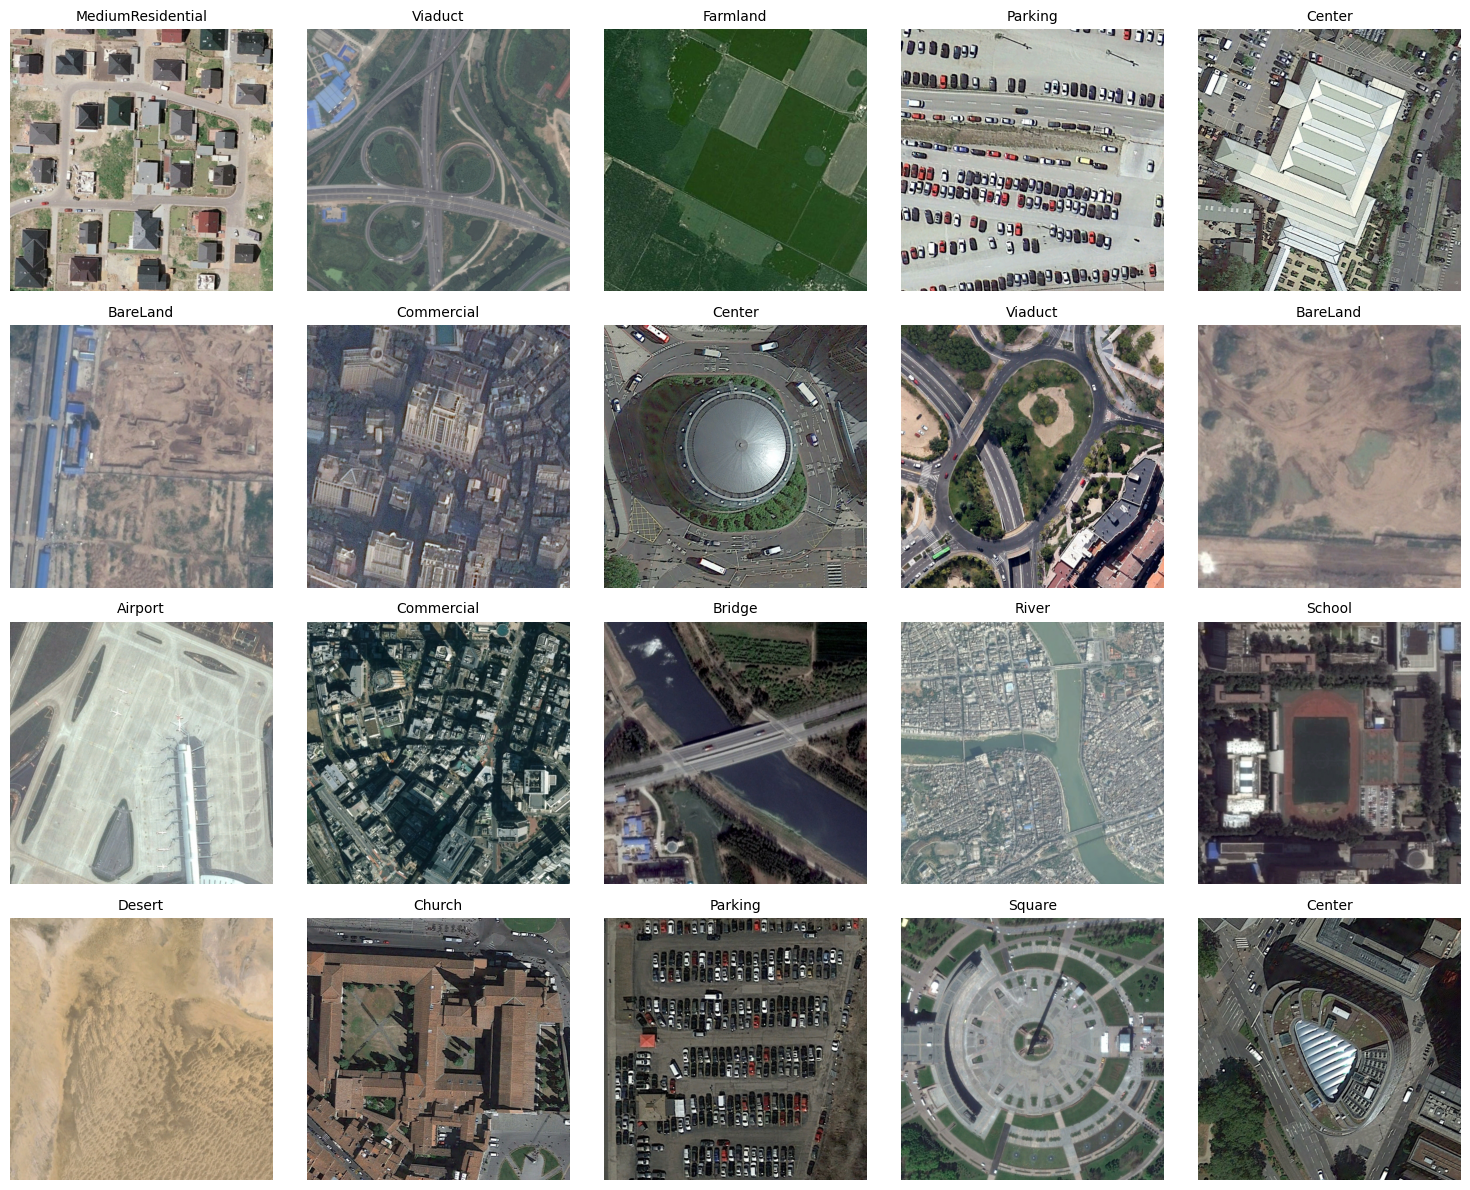

In [ ]:
# 20 rastgele resim seçmek için
random_images = []
random_image_classes = []

# Rastgele 20 resim seç
for _ in range(20):
    # Rastgele bir sınıf seç
    random_class = random.choice(list(train_data.keys()))
    
    # Seçilen sınıftan rastgele bir resim seç
    random_image_path = random.choice(train_data[random_class])
    
    # Resmi yükle ve PyTorch dönüşümünü uygula
    image = Image.open(random_image_path).convert('RGB')  # Siyah beyazsa RGB'ye dönüştür
    transformed_image = transform(image)  # Dönüştür
    
    # Resmi ve sınıf adını listeye ekle
    random_images.append(transformed_image)
    random_image_classes.append(random_class)

# Görselleri bir arada gösterme
fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # 4 satır, 5 sütun şeklinde
axes = axes.flatten()  # Alt grafiklerin bir düzeyde olmasını sağla

# Tensörleri yeniden normalize edip (0-1 aralığına getirerek) görselleştir
for i, ax in enumerate(axes):
    # Tensörü yeniden normalize et ve Görüntüyü NumPy dizisine çevir
    image = random_images[i].clone()
    image = (image * 0.5 + 0.5).numpy()  # Ters normalize et. Görselleştirme için
    image = image.transpose(1, 2, 0)  # (C, H, W) -> (H, W, C). Görüntü işleme ve görselleştirme araçları (örneğin, matplotlib.pyplot.imshow) genellikle (H, W, C) formatını kullanır.
    
    ax.imshow(image)  # Görüntüyü göster
    ax.axis('off')  # Eksenleri kaldır
    ax.set_title(random_image_classes[i], fontsize=10)  # Resmin altına sınıf adını yaz

plt.tight_layout()  # Düzeni düzenle
plt.show()

# **MODEL EĞİTİMİ**

**Pretrained model kullanmayacaksanız aşağıdaki gibi model oluşturabilirsiniz.**

In [172]:
# class CNNModel(nn.Module):
#     def __init__(self):
#         super(CNNModel, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # 3 kanal (RGB) için
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
#         self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Boyutlar veriye göre ayarlanabilir
#         self.fc2 = nn.Linear(128, 10)  # 10 sınıf örneği için

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = x.view(-1, 64 * 8 * 8)  # Özellik vektörüne dönüştürme
#         x = torch.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x


In [ ]:

from torchvision import datasets, transforms, models
from sklearn.metrics import accuracy_score

# Transform tanımlaması
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Veri setlerini yükleme
train_dir = r'C:\Users\ASUS\Desktop\classifi\supervised\dataset\train'
test_dir = r'C:\Users\ASUS\Desktop\classifi\supervised\dataset\test'

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Modeli Tanımlama (önceden eğitilmiş bir model kullanıyoruz, örneğin ResNet18)
model = models.resnet18(pretrained=True)

# Modelin son katmanını sınıf sayısına göre değiştirme
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))  # Çıkış katmanı, sınıf sayısına göre

# Modeli GPU'ya taşıma
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Kayıp fonksiyonu ve optimizasyon
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Eğitim fonksiyonu
num_epochs = 10
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    # Modeli doğrulama seti üzerinde değerlendirme
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    val_acc = accuracy_score(y_true, y_pred)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Validation Accuracy: {val_acc:.4f}")


Epoch [1/10], Loss: 0.8964, Validation Accuracy: 0.6980
Epoch [2/10], Loss: 0.4242, Validation Accuracy: 0.8160
Epoch [3/10], Loss: 0.2782, Validation Accuracy: 0.8050
Epoch [4/10], Loss: 0.2051, Validation Accuracy: 0.8230
Epoch [5/10], Loss: 0.1809, Validation Accuracy: 0.8100
Epoch [6/10], Loss: 0.1613, Validation Accuracy: 0.7590
Epoch [7/10], Loss: 0.1269, Validation Accuracy: 0.8680
Epoch [8/10], Loss: 0.1135, Validation Accuracy: 0.8690
Epoch [9/10], Loss: 0.0905, Validation Accuracy: 0.8580
Epoch [10/10], Loss: 0.0823, Validation Accuracy: 0.8680


Bir epoch, modelin eğitim veri kümesinin tamamını bir kez ileri ve geri (forward & backward pass) geçmesidir.

Loss Değeri (0.9249): Bu, 1. epoch sonunda modelin tahminleri ile gerçek etiketler arasındaki ortalama farktır.

Daha düşük loss daha iyi performansı ifade eder.

Loss, doğruluğun (accuracy) doğrudan bir göstergesi değildir, ancak modele geri yayılım (backpropagation) için önemli bir metriktir.

Validation Accuracy: 0.7420 ,Modelin doğrulama veri kümesindeki tahminlerinin %74.2'si doğru anlamına gelir.


*MODEL TESTİ VE GÖRÜNTÜLEME*

In [205]:
# Test doğruluğu hesaplama
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

test_acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8680


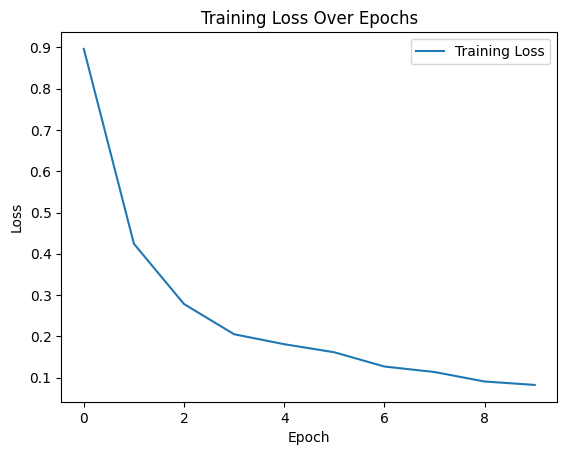

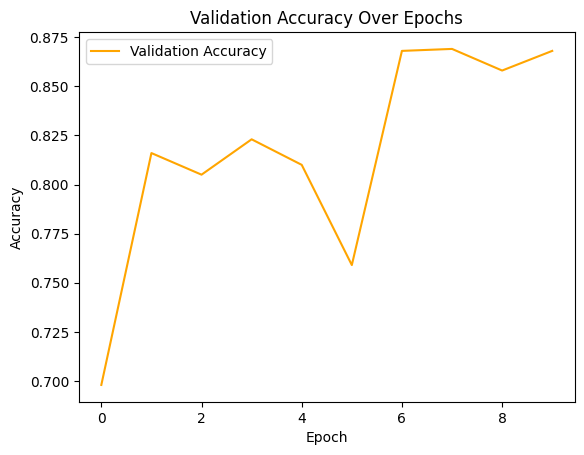

In [206]:
# Eğitim kaybı ve doğruluğu görselleştirme
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

plt.plot(range(num_epochs), val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5418272..1.4801308].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13939553..1.530268].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.37057972..0.99211335].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.23358166..1.732854].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07089651..1.7851416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.29901958..1.6195644].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.45

Test Accuracy: 86.80%


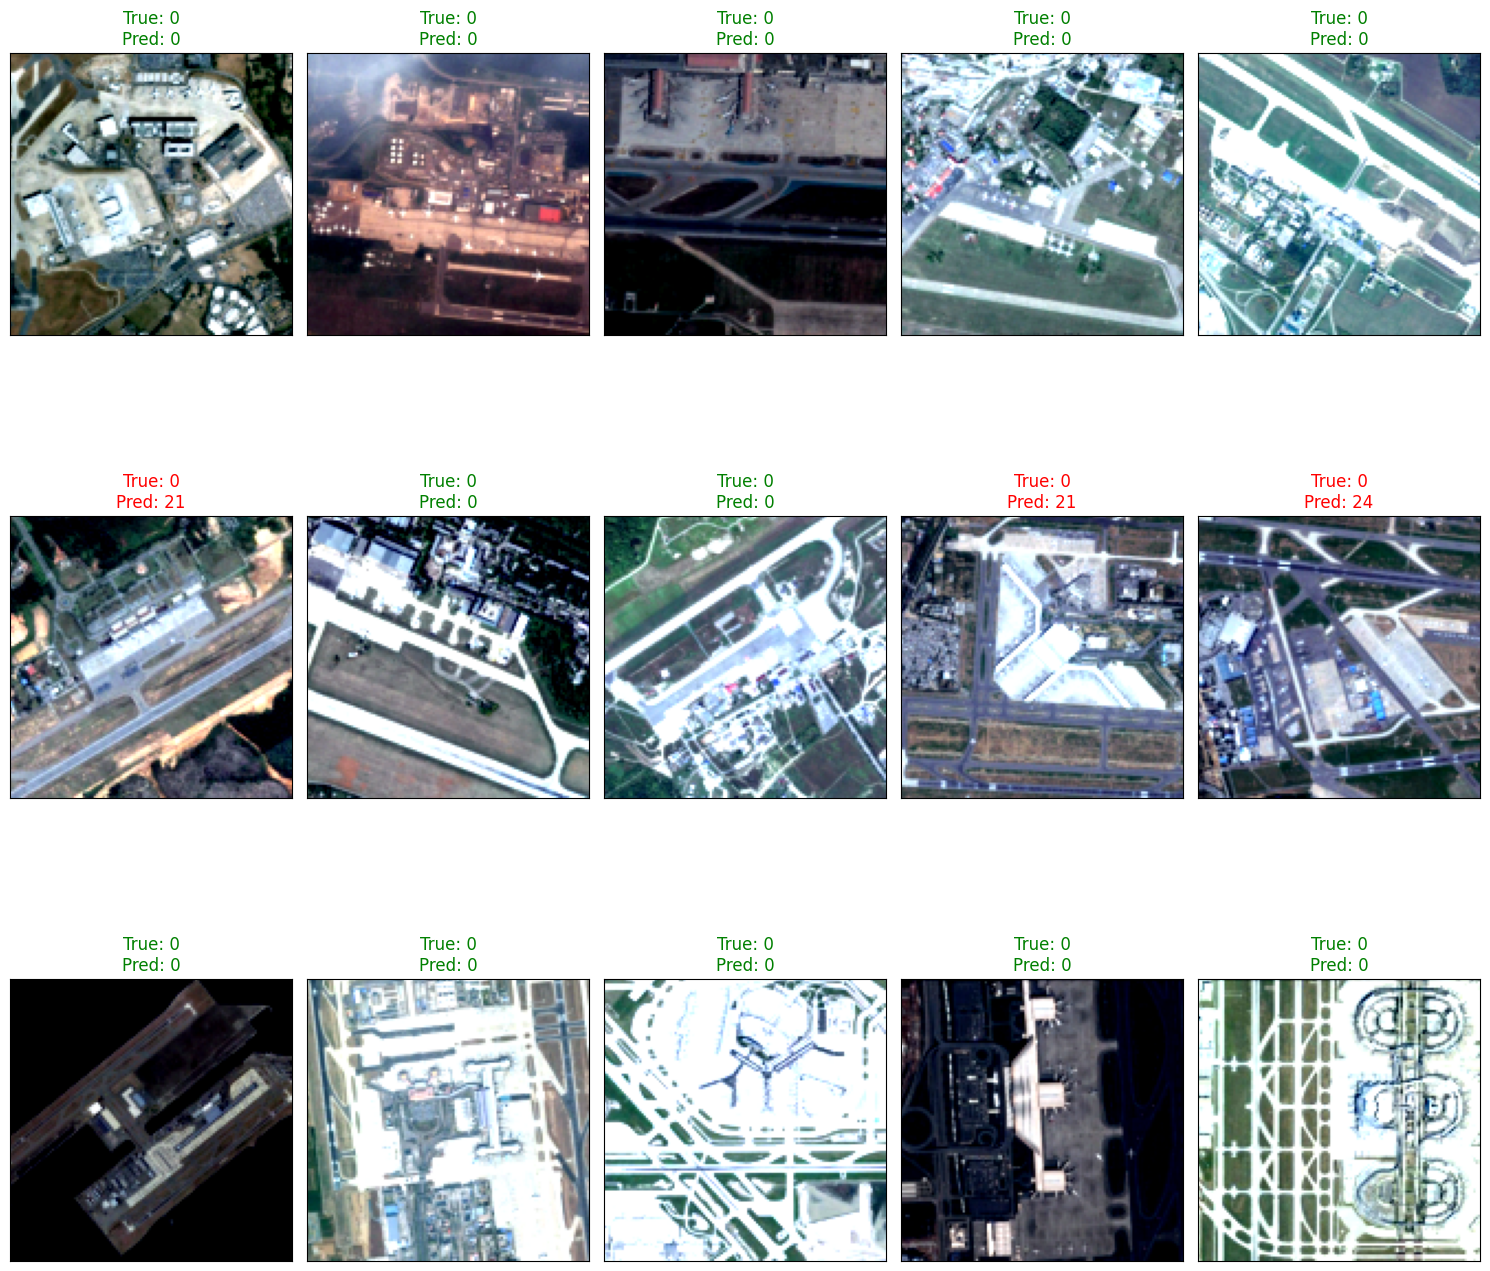

In [215]:
from torchvision import models

# Modeli GPU'ya taşıma
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Model Testi
model.eval()
correct = 0
total = 0
all_images = []
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        # Veriyi cihaz ile uyumlu hale getirin
        images, labels = images.to(device), labels.to(device)
        
        # Modelden tahmin alın
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # Toplam doğruluk hesaplama
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Görselleştirme için görüntüleri, etiketleri ve tahminleri toplama
        all_images.extend(images.cpu())  # CPU'ya taşıyın ve listeye ekleyin
        all_labels.extend(labels.cpu())
        all_predictions.extend(predicted.cpu())

# Test Doğruluğunu Yazdırma
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# Görselleştirme
plt.figure(figsize=(15, 15))
color_maps = ['gray', 'viridis', 'plasma', 'inferno', 'magma', 'jet', 'binary', 'cividis', 'ocean', 'spring']

# İlk 20 resmi görselleştirme
for i in range(min(15, len(all_images))):  # Görseller sınırlıysa hata almamak için kontrol
    plt.subplot(3, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Ters normalize işlemi (normalize edilmiş veriyi orijinal haline getirme)
    image = all_images[i].permute(1, 2, 0).numpy()  # (C, H, W) -> (H, W, C)
    image = image * 0.5 + 0.5  # Normalize'den çıkart
    
    # Etiket ve tahmin değerlerini alın
    true_label = all_labels[i].item()
    pred_label = all_predictions[i].item()
    
    # Renk haritası seçimi
    cmap_choice = color_maps[i % len(color_maps)]
    
    # Görüntüyü çizdirin
    plt.imshow(image, cmap=cmap_choice)
    plt.title(f"True: {true_label}\nPred: {pred_label}", 
              color="green" if true_label == pred_label else "red")

plt.tight_layout()
plt.show()